<a href="https://colab.research.google.com/github/preethir-18/Complex-Network-Analysis/blob/main/Copy_of_ComCog_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mne
!pip install mat73
!pip install mne_connectivity
!pip install networkx

In [ ]:
import numpy as np
import mne
from scipy.io import loadmat
import mat73
from matplotlib import pyplot as plt 
from mne_connectivity import spectral_connectivity_epochs
import networkx as nx
import pandas as pd

In [ ]:
import seaborn as sns
import networkx.algorithms.community as nx_comm
from networkx.algorithms.community import greedy_modularity_communities

In [ ]:
mne.set_log_level('error')

In [ ]:
#Importing data of subject 1

data = mat73.loadmat(r"/content/drive/MyDrive/ComCog Project Data/music_listening_experiment_s01.mat", only_include = None)

In [ ]:
data

In [ ]:
eeg_songs = data['EEG_Songs']
s_freq = data['Fs']  #sampling frequency = 128
channel=['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
ch_name = np.array(channel)

In [ ]:
eeg_song = dict()
for  song_no in range(30):  #30 songs are used in the study
  eeg_songs = ((data['EEG_Songs'])[song_no])
  eeg_song[song_no] = eeg_songs
  eeg_songs = np.empty((14, 10240))

s_rate_list = data['song_ratings']

In [ ]:
rate_1 = []
rate_5 = []
for i in range(30):
  if(s_rate_list[i] == 1):
    rate_1.append(i)
  elif(s_rate_list[i] == 5):
    rate_5.append(i)


CONNECTIVITY MATRICES

In [ ]:
#epoching the given data
epoch = dict()
for song_no in range(30):
  epochs=np.empty((80,14,128))
  a=0
  b=128
  for i in range(80):
    for j in range(14):
      channels = (eeg_song[song_no])[j]
      seg = np.array(channels[a:b])
      for k in range(128):
        epochs[i,j,k] = seg[k]
    a=b
    b=a+128
    epoch[song_no] = epochs

In [ ]:
#Lower and Upper frequency band of interest

fmin = 30.0
fmax = 45.0

In [ ]:
#Computing WPLI for each phase relationship

matrix = dict()

for song_no in range(30):
  matrices = spectral_connectivity_epochs(epoch[song_no], names=ch_name, method='wpli', indices=None, sfreq=s_freq,fmin=fmin,fmax=fmax,faverage=True)
  matrix[song_no] = matrices


In [ ]:
#Connectivity matrix computed using WPLI

conmat = dict()

for song_no in range(30):
  conmats = matrix[song_no].get_data(output='dense')[:, :, 0]
  conmat[song_no] = conmats

In [ ]:
t = conmat[10]
c = pd.DataFrame(t, index=channel, columns=channel)
plt.figure(figsize=(10,8))
plot = sns.heatmap(c)
plt.savefig('song11.png')

In [ ]:
#Computing the connectivity matrics for all songs after applying different thresholds

threshold_mat = dict()

threshold = [0.2, 0.3, 0.4]

for song_no in range(30):
  thresh_mat = dict()
  conmat_new = np.empty((14,14))
  for value in threshold:
    for i in range(14):
      for j in range(14):
        if((conmat[song_no])[i, j] >= value):
          conmat_new[i, j] = (conmat[song_no])[i, j]
        else:
          conmat_new[i, j] = 0.0
    thresh_mat[value] = conmat_new
    conmat_new = np.empty((14,14))
  threshold_mat[song_no] = thresh_mat
  thresh_mat = dict()

In [ ]:
temp = (np.array((threshold_mat[0])[0.3]))
cmat = pd.DataFrame(temp, index=channel, columns=channel)
plt.figure(figsize=(10,8))
plot = sns.heatmap(cmat)
plt.savefig('song1_0.3.png')

In [ ]:
cmat

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
AF3,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
F7,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
F3,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
FC5,0.0,0.000000,0.386693,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
T7,0.0,0.550688,0.462379,0.410762,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
P7,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
O1,0.0,0.000000,0.000000,0.000000,0.357933,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
O2,0.0,0.000000,0.000000,0.000000,0.469961,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
P8,0.0,0.000000,0.000000,0.000000,0.530276,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
T8,0.0,0.000000,0.000000,0.000000,0.329551,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


PLOTTING THE GRAPHS

In [ ]:
from mne.viz import circular_layout
from mne_connectivity.viz import plot_connectivity_circle

In [ ]:
graph = dict()

In [ ]:
#Computing the graphs for all the songs for different set thresholds

graph_all = dict()
for thresh in threshold:
  graph_temp = dict()
  for song_no in range(30):
    temp = np.array((threshold_mat[song_no])[thresh])
    G = nx.from_numpy_matrix(temp)
    label_mapping = dict(zip(G.nodes(),ch_name))
    H = nx.relabel_nodes(G, label_mapping)

    H1 = nx.to_numpy_array(H)
    graph_temp[song_no] = H1
    H1 = np.zeros((14,14))
  graph_all[thresh] = graph_temp

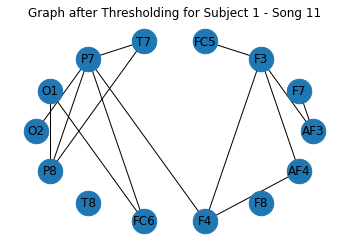

In [ ]:
G = nx.from_numpy_matrix(graph_all[0.3][10])
label_mapping = dict(zip(G.nodes(),ch_name))
H = nx.relabel_nodes(G, label_mapping)
nx.draw_networkx(H, pos = nx.circular_layout(H), label=True, node_size=600)

plt.axis('off')
plt.title('Graph after Thresholding for Subject 1 - Song 11')
plt.savefig("ThGp-Song11-0.3.png") 
plt.show()

In [ ]:
nx.draw_networkx(H, pos = nx.spring_layout(H), label=True, width=widths, node_size=600)


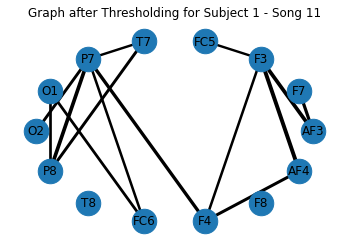

In [ ]:
G = nx.from_numpy_matrix(graph_all[0.3][10])
label_mapping = dict(zip(G.nodes(),ch_name))
H = nx.relabel_nodes(G, label_mapping)

all_weights = []
#4 a. Iterate through the graph nodes to gather all the weights
for (node1,node2,data) in G.edges(data=True):
    all_weights.append(data['weight']) #we'll use this when determining edge thickness

#4 b. Get unique weights
unique_weights = list(set(all_weights))

node_list = G.nodes()
#4 c. Plot the edges - one by one!
widths=[]
for weight in unique_weights:
    #4 d. Form a filtered list with just the weight you want to draw
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
    #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
    #print(all_weights)
    width = weight*len(node_list)*(3.0/np.sum(all_weights))
    widths.append(width)
nx.draw_networkx(H, pos = nx.circular_layout(H), label=True, width=widths, node_size=600)
    
 
 #Plot the graph
plt.axis('off')
plt.title('Graph after Thresholding for Subject 1 - Song 11')
plt.savefig("ThGrp-Song11-0.3.png") 
plt.show()

In [ ]:
node_list = [i+1 for i in range(14)]
node_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
from networkx.algorithms import community
from statistics import mean

In [ ]:
print(nx.is_connected((nx.from_numpy_matrix(graph_all[0.4][1]))))

In [ ]:
graph_all[0.4][1]

In [ ]:
clustering = {'Threshold' : threshold}
CPL = {'Threshold' : threshold}
edge_cent = {'Threshold' : threshold}
node_cent = {'Threshold' : threshold}

for song_no in rate_1: 
  acc = [] #acc - average clustering coefficient
  cp_len = [] #cp_len - characteristic path length
  edbc_avg = [] #edbc_avg - edge_betweenness_centrality
  ndbc_avg = [] #ndbc_avg - Node Betweenness centrality
  for thresh in threshold:
    temp = (graph_all[thresh])[song_no]
    G = nx.from_numpy_matrix(temp)
    label_mapping = dict(zip(G.nodes(),node_list))
    H = nx.relabel_nodes(G, label_mapping)

    #Calculating Average Clustering Coefficient
    clus = nx.average_clustering(H)
    acc.append(clus)

    #Calculating Path length and averaging them as it is not a complete graph
    spl = dict(nx.shortest_path_length(H))
    sum=0
    c=0
    for i in node_list:
      value = dict() 
      key = spl[i].keys()
      for j in node_list:
        if(j in key):
          sum = sum+spl[i][j]
          c=c+1
        else:
          continue
    avg_pl = sum/c
    cp_len.append(avg_pl)

    #Calculating Edge Betweenness Centrality
    edbc = mean(nx.edge_betweenness_centrality(H).values())
    edbc_avg.append(edbc)

    #Calculating Node Betweenness Centrality
    ndbc = mean(nx.betweenness_centrality(H).values())
    ndbc_avg.append(ndbc)

  clustering[(song_no+1)] = acc
  CPL[(song_no+1)] = cp_len
  edge_cent[(song_no+1)] = edbc_avg
  node_cent[(song_no+1)] = ndbc_avg

df = pd.DataFrame(clustering)
df1 = pd.DataFrame(CPL)
df2 = pd.DataFrame(edge_cent)
df3 = pd.DataFrame(node_cent)

with pd.ExcelWriter('Songs-Rating1.xlsx') as writer:
  df.to_excel(writer, sheet_name="Average Clustering Coefficient", index=False)
  df1.to_excel(writer, sheet_name="Characteristic Path Length", index=False)
  df2.to_excel(writer, sheet_name="Edge Betweenness Centrality", index=False)
  df3.to_excel(writer, sheet_name="Node Betweenness Centrality", index=False)


In [ ]:
clustering = {'Threshold' : threshold}
CPL = {'Threshold' : threshold}
edge_cent = {'Threshold' : threshold}
node_cent = {'Threshold' : threshold}

for song_no in rate_5: 
  acc = [] #acc - average clustering coefficient
  cp_len = [] #cp_len - characteristic path length
  edbc_avg = [] #edbc_avg - edge_betweenness_centrality
  ndbc_avg = [] #ndbc_avg - Node Betweenness centrality
  for thresh in threshold:
    temp = (graph_all[thresh])[song_no]
    G = nx.from_numpy_matrix(temp)
    label_mapping = dict(zip(G.nodes(),node_list))
    H = nx.relabel_nodes(G, label_mapping)

    #Calculating Average Clustering Coefficient
    clus = nx.average_clustering(H)
    acc.append(clus)

    #Calculating Path length and averaging them as it is not a complete graph
    spl = dict(nx.shortest_path_length(H))
    sum=0
    c=0
    for i in node_list:
      value = dict() 
      key = spl[i].keys()
      for j in node_list:
        if(j in key):
          sum = sum+spl[i][j]
          c=c+1
        else:
          continue
    avg_pl = sum/c
    cp_len.append(avg_pl)

    #Calculating Edge Betweenness Centrality
    edbc = mean(nx.edge_betweenness_centrality(H).values())
    edbc_avg.append(edbc)
    print(edbc)

    #Calculating Node Betweenness Centrality
    ndbc = mean(nx.betweenness_centrality(H).values())
    ndbc_avg.append(ndbc)

  clustering[(song_no+1)] = acc
  CPL[(song_no+1)] = cp_len
  edge_cent[(song_no+1)] = edbc_avg
  node_cent[(song_no+1)] = ndbc_avg

df = pd.DataFrame(clustering)
df1 = pd.DataFrame(CPL)
df2 = pd.DataFrame(edge_cent)
df3 = pd.DataFrame(node_cent)

with pd.ExcelWriter('Song-Rating5.xlsx') as writer:
  df.to_excel(writer, sheet_name="Average Clustering Coefficient", index=False)
  df1.to_excel(writer, sheet_name="Characteristic Path Length", index=False)
  df2.to_excel(writer, sheet_name="Edge Betweenness Centrality", index=False)
  df3.to_excel(writer, sheet_name="Node Betweenness Centrality", index=False)
